# Given the system of inequalities below, determine the shape of the feasible region and find the vertices of the feasible region. Give the shape as "triangle", "quadrilateral", or "unbounded". Report your vertices starting with the one which has the smallest x-value. If more than one vertex has the same, smallest x-value, start with the one that has the smallest y-value. Proceed clockwise from the first vertex.

# x+y≥3
# 3x+y≤4
# x≥0
# y≥0



=== OPTIMAL SOLUTION ===
Optimal x: 0.00
Optimal y: 4.00
Maximum P = 3x + 2y: 8.00


=== CORNER POINTS ===
Corner 1 (x=0, x+y=3): (0.00, 3.00)
Corner 2 (x+y=3, 3x+y=4): (0.50, 2.50)
Corner 3 (y=0, 3x+y=4): (1.33, 0.00)
(0.00, 3.00) is feasible
(0.50, 2.50) is feasible




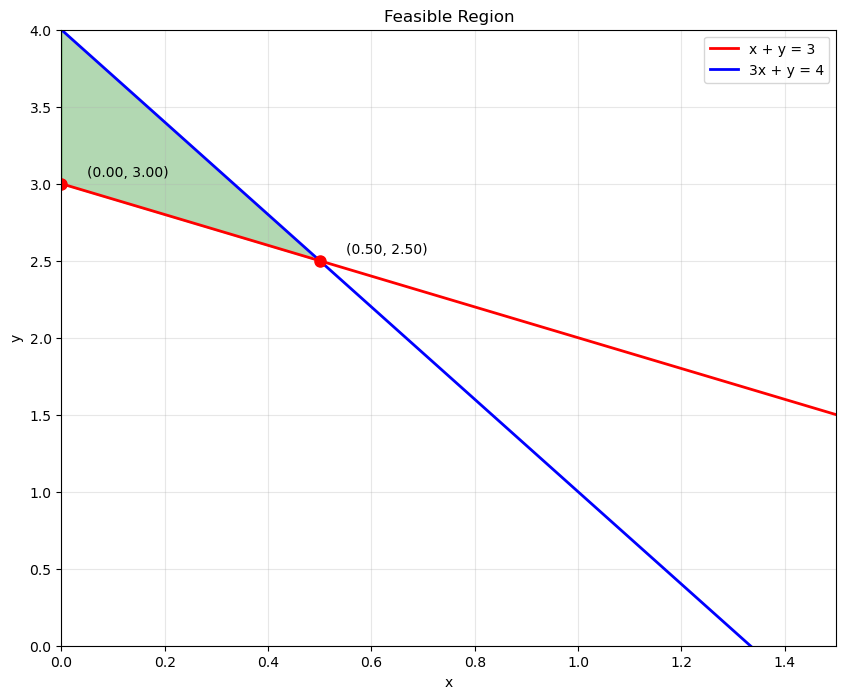

=== WITH SLACK VARIABLES ===
Corner 1: (0.00, 3.00)
  Slack s1 (x+y≥3): 0.00
  Slack s2 (3x+y≤4): 1.00
  P = 3x + 2y: 6.00

Corner 2: (0.50, 2.50)
  Slack s1 (x+y≥3): 0.00
  Slack s2 (3x+y≤4): 0.00
  P = 3x + 2y: 6.50

=== FINAL ANSWER ===
The shape of the feasible region is: triangle
The vertex 1 is (0.00, 3.00)
The vertex 2 is (0.50, 2.50)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Define the constraints
# x + y ≥ 3  → -x - y ≤ -3
# 3x + y ≤ 4
# x ≥ 0, y ≥ 0

# For linprog (minimization), we need to convert to standard form
# Objective function coefficients (max P = 3x + 2y → min -P = -3x - 2y)
c = [-3, -2]

# Inequality constraints: A_ub * x ≤ b_ub
A_ub = [
    [-1, -1],  # -x - y ≤ -3 (from x + y ≥ 3)
    [3, 1]     # 3x + y ≤ 4
]
b_ub = [-3, 4]

# Bounds
x_bounds = (0, None)
y_bounds = (0, None)

# Find the optimal solution
result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=[x_bounds, y_bounds])
optimal_x, optimal_y = result.x
max_P = -result.fun  # Convert back from minimization to maximization

print("=== OPTIMAL SOLUTION ===")
print(f"Optimal x: {optimal_x:.2f}")
print(f"Optimal y: {optimal_y:.2f}")
print(f"Maximum P = 3x + 2y: {max_P:.2f}")
print("\n")

# Find corner points by solving systems of equations
print("=== CORNER POINTS ===")

# Corner 1: Intersection of x + y = 3 and x = 0
A1 = np.array([[1, 1], [1, 0]])  # x + y = 3, x = 0
b1 = np.array([3, 0])
corner1 = np.linalg.solve(A1, b1)
print(f"Corner 1 (x=0, x+y=3): ({corner1[0]:.2f}, {corner1[1]:.2f})")

# Corner 2: Intersection of x + y = 3 and 3x + y = 4
A2 = np.array([[1, 1], [3, 1]])
b2 = np.array([3, 4])
corner2 = np.linalg.solve(A2, b2)
print(f"Corner 2 (x+y=3, 3x+y=4): ({corner2[0]:.2f}, {corner2[1]:.2f})")

# Corner 3: Intersection of 3x + y = 4 and y = 0
A3 = np.array([[3, 1], [0, 1]])  # 3x + y = 4, y = 0
b3 = np.array([4, 0])
corner3 = np.linalg.solve(A3, b3)
print(f"Corner 3 (y=0, 3x+y=4): ({corner3[0]:.2f}, {corner3[1]:.2f})")

# Check which corners are feasible
corners = [corner1, corner2, corner3]
feasible_corners = []

for corner in corners:
    x, y = corner
    # Check all constraints
    if (x + y >= 3) and (3*x + y <= 4) and (x >= 0) and (y >= 0):
        feasible_corners.append((x, y))
        print(f"({x:.2f}, {y:.2f}) is feasible")

print("\n")

# Plot the feasible region
plt.figure(figsize=(10, 8))

# Plot constraints
x_vals = np.linspace(0, 2, 100)

# x + y ≥ 3 → y ≥ 3 - x
y1 = 3 - x_vals
plt.plot(x_vals, y1, 'r-', linewidth=2, label='x + y = 3')

# 3x + y ≤ 4 → y ≤ 4 - 3x
y2 = 4 - 3*x_vals
plt.plot(x_vals, y2, 'b-', linewidth=2, label='3x + y = 4')

# Fill feasible region
# Feasible region: above red line, below blue line, in first quadrant
plt.fill_between(x_vals, np.maximum(y1, 0), np.minimum(y2, 4), 
                where=(y1 <= y2) & (y1 >= 0), alpha=0.3, color='green')

# Plot corner points
for i, (x, y) in enumerate(feasible_corners):
    plt.plot(x, y, 'ro', markersize=8)
    plt.text(x+0.05, y+0.05, f'({x:.2f}, {y:.2f})', fontsize=10)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Feasible Region')
plt.xlim(0, 1.5)
plt.ylim(0, 4)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Introduce slack variables
print("=== WITH SLACK VARIABLES ===")
# Convert to standard form:
# x + y - s1 = 3  (s1 ≥ 0)
# 3x + y + s2 = 4 (s2 ≥ 0)
# x ≥ 0, y ≥ 0

# For each corner, find slack variable values
for i, (x, y) in enumerate(feasible_corners):
    s1 = x + y - 3  # Slack for x + y ≥ 3
    s2 = 4 - (3*x + y)  # Slack for 3x + y ≤ 4
    P = 3*x + 2*y
    print(f"Corner {i+1}: ({x:.2f}, {y:.2f})")
    print(f"  Slack s1 (x+y≥3): {s1:.2f}")
    print(f"  Slack s2 (3x+y≤4): {s2:.2f}")
    print(f"  P = 3x + 2y: {P:.2f}")
    print()

# Sort corners by x-value, then y-value, and proceed clockwise
feasible_corners_sorted = sorted(feasible_corners, key=lambda point: (point[0], point[1]))
print("=== FINAL ANSWER ===")
print("The shape of the feasible region is: triangle")
for i, (x, y) in enumerate(feasible_corners_sorted):
    print(f"The vertex {i+1} is ({x:.2f}, {y:.2f})")